In [3]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('chesterish')
# Command so that plots appear in the iPython Notebook
%matplotlib inline

(0.0, 1.0)

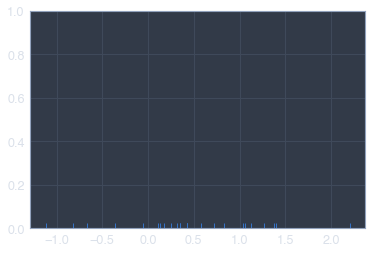

In [16]:

# Let's start off with a carpet/rug plot
# A rug plot simpot puts ticks wherever a value occured

#Create dataset
dataset = randn(25)
#Create rugplot
sns.rugplot(dataset)
#Set y-axis limit
plt.ylim(0,1)

<AxesSubplot:>

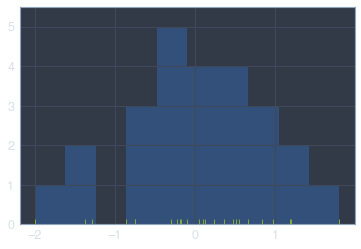

In [9]:
plt.hist(dataset,alpha=0.4)
sns.rugplot(dataset)

(0.0, 1.0)

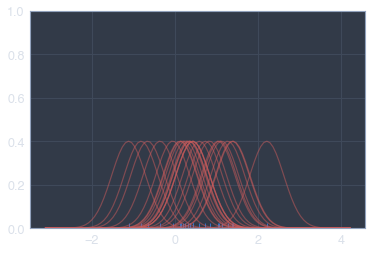

In [34]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'indianred',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

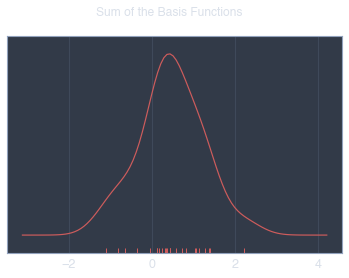

In [33]:
# To get the kde plot we can sum these basis functions.
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:ylabel='Density'>

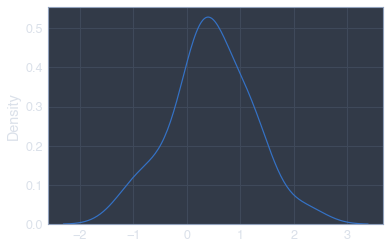

In [36]:
# Now we can see how to do it in one step with seaborn! Awesome!
sns.kdeplot(dataset)

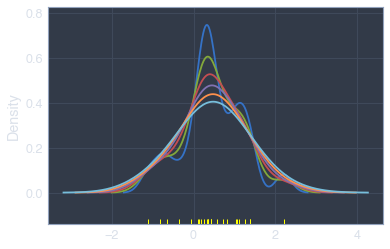

In [54]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='yellow')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw_adjust=bw,lw=1.8,label=bw)

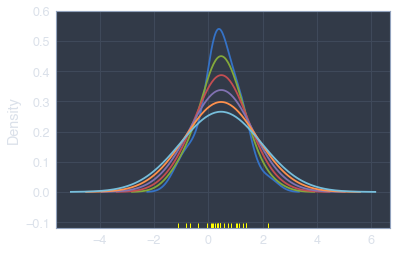

In [60]:
sns.rugplot(dataset,color='yellow')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw_method=bw,lw=1.8,label=bw)

<AxesSubplot:ylabel='Density'>

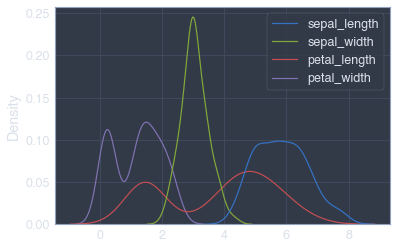

In [73]:
# We can also choose different kernels

kernel_options = ["gau"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend

iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)

<AxesSubplot:xlabel='Density'>

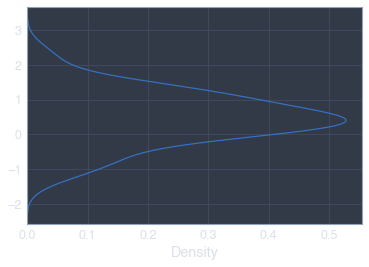

In [71]:
# For vertical axis, use the vertical keyword
sns.kdeplot(y=dataset)

<AxesSubplot:ylabel='Density'>

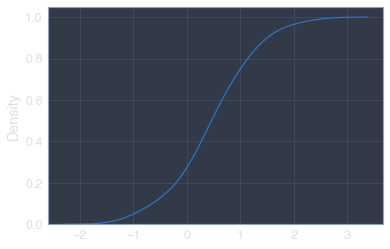

In [78]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

In [104]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
print(dframe)
# Plot our dataframe
#sns.kdeplot(dframe)


            X          Y
0   -1.161635 -11.889744
1   -1.110026   2.413662
2   -0.164586 -12.957832
3    2.260581 -15.307969
4   -0.812951  13.495376
..        ...        ...
995  0.258663  -6.617099
996  1.183908  -0.788209
997 -0.733097   3.009832
998  0.516847  -1.567363
999  0.576619   3.245336

[1000 rows x 2 columns]


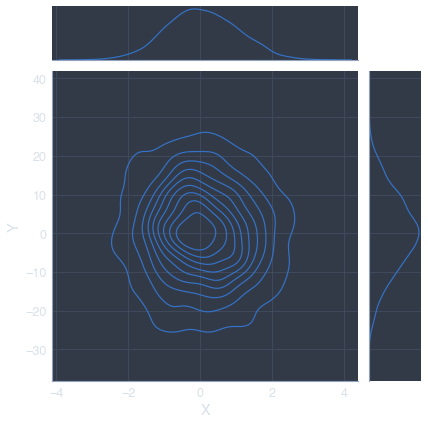

In [112]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot(x='X',y='Y',data=dframe,kind='kde')